In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Ames_Housing_Clean_Data(remove skew).csv')

## Import Data

In [3]:
df.head()

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCond_AdjLand,SaleCond_Alloca,SaleCond_Family,SaleCond_Normal,SaleCond_Partial
0,141.0,31770,1,0,6,5,1960,1960,112.0,2,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,0,0,5,6,1961,1961,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,1,0,6,6,1958,1958,108.0,2,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,0,0,7,5,1968,1968,0.0,1,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,1,0,5,5,1997,1998,0.0,2,...,0,0,0,0,1,0,0,0,1,0


In [4]:
df.corr()['SalePrice'].sort_values()

Exter Qual      -0.701881
Kitchen Qual    -0.676143
Bsmt Qual       -0.634901
Garage Finish   -0.594386
Fireplace Qu    -0.544786
                   ...   
Garage Area      0.670630
Garage Cars      0.688611
Gr Liv Area      0.705587
Overall Qual     0.824929
SalePrice        1.000000
Name: SalePrice, Length: 233, dtype: float64

In [5]:
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [6]:
x

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCond_AdjLand,SaleCond_Alloca,SaleCond_Family,SaleCond_Normal,SaleCond_Partial
0,141.000000,31770,1,0,6,5,1960,1960,112.0,2,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,0,0,5,6,1961,1961,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,1,0,6,6,1958,1958,108.0,2,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,0,0,7,5,1968,1968,0.0,1,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,1,0,5,5,1997,1998,0.0,2,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,37.000000,7937,1,0,6,6,1984,1984,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2831,75.157303,8885,1,1,5,5,1983,1983,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2832,62.000000,10441,0,0,5,5,1992,1992,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2833,77.000000,10010,0,1,5,5,1974,1975,0.0,2,...,0,0,0,0,1,0,0,0,1,0


In [7]:
y

0       463.680925
1       324.037035
2       414.728827
3       493.963561
4       435.775171
           ...    
2830    377.491722
2831    361.939221
2832    363.318042
2833    412.310563
2834    433.589668
Name: SalePrice, Length: 2835, dtype: float64

## LINEAR REGRESSION

**Train | Test Split**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [10]:
x_train

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCond_AdjLand,SaleCond_Alloca,SaleCond_Family,SaleCond_Normal,SaleCond_Partial
2042,78.000000,9317,1,0,6,5,2006,2006,0.0,1,...,0,0,0,0,1,0,0,0,1,0
1920,40.000000,3880,0,0,5,9,1945,1997,0.0,2,...,0,0,0,0,1,0,0,0,1,0
938,78.870370,6853,1,0,8,5,2001,2002,136.0,1,...,0,0,0,0,1,0,0,0,1,0
824,67.000000,16285,2,0,7,5,2001,2002,0.0,1,...,0,0,0,0,1,0,0,0,1,0
90,25.000000,4835,1,0,7,5,2004,2005,0.0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,80.000000,9600,0,0,5,7,1950,2007,0.0,1,...,0,0,0,0,1,0,0,0,1,0
1599,80.000000,11584,0,0,7,6,1979,1979,96.0,2,...,0,0,0,0,1,0,0,0,1,0
1361,85.176471,2887,0,0,6,5,1996,1997,0.0,2,...,0,0,0,0,1,0,0,0,1,0
1547,21.000000,1596,0,0,4,6,1973,1973,0.0,2,...,0,0,0,0,1,0,0,0,1,0


In [11]:
len(x_train)

1984

In [12]:
len(x_test)

851

**Create an Estimator**

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model=LinearRegression()

In [15]:
model.fit(x_train,y_train)

LinearRegression()

In [16]:
test_pred=model.predict(x_test)

In [17]:
y_test

1234    398.748041
1249    396.862697
1871    339.116499
80      334.664011
917     273.861279
           ...    
759     287.228132
660     344.818793
2118    334.664011
1067    500.000000
38      539.389470
Name: SalePrice, Length: 851, dtype: float64

In [18]:
test_pred

array([406.40473058, 392.06261862, 345.78370682, 346.64430965,
       260.89633669, 394.74553435, 546.8262674 , 411.79957119,
       479.85013647, 366.4028896 , 422.45122315, 507.20743283,
       339.46542622, 362.07590764, 400.1377628 , 309.54701601,
       650.38065961, 275.93793671, 359.42535348, 372.73252216,
       487.78057027, 530.28977025, 367.77412139, 401.9467057 ,
       294.10734644, 484.05769457, 556.315236  , 314.57886446,
       412.67199843, 405.32754968, 379.68482793, 319.99693094,
       427.65686959, 369.51232194, 388.82069418, 474.76195519,
       604.33382899, 408.86016757, 284.071697  , 298.60262487,
       285.26309192, 302.31937172, 422.4736446 , 481.12301053,
       516.98408259, 450.04020476, 524.15420961, 374.60150601,
       354.87512181, 363.56086669, 496.66002734, 410.57095311,
       335.12530591, 388.15095671, 497.80256515, 439.22906782,
       291.60164626, 503.82440328, 467.030768  , 336.19571378,
       416.17839809, 405.08972567, 358.87019063, 369.84

**Test 1 - MAE, MSE, RMSE**

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [20]:
MAE=mean_absolute_error(y_test,test_pred)

MAE

14.738217719801288

In [21]:
MSE = mean_squared_error(y_test,test_pred)

MSE

391.06582706768944

In [22]:
RMSE= np.sqrt(MSE)

RMSE

19.775384372185776

In [23]:
#predict on train set

train_pred=model.predict(x_train)

MSE = mean_squared_error(y_train,train_pred)
RMSE= np.sqrt(MSE)

RMSE

18.43328617680798

 If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data, i.e. you've created a model that tests well in sample, but has little predictive value when tested out of sample.

In [24]:
df['SalePrice'].mean()

412.2567174216169

In [25]:
RMSE*100/df['SalePrice'].mean()

4.471312509374146

4% percent of error percentage for predicting sales price

**Test 2 - Residual Plot and Distribution Plot**

In [26]:
test_res=y_test-test_pred

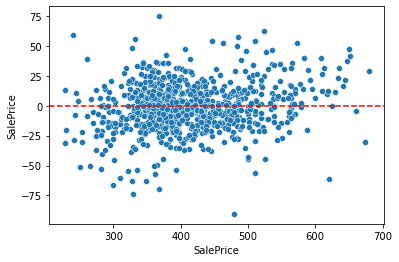

In [27]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--');

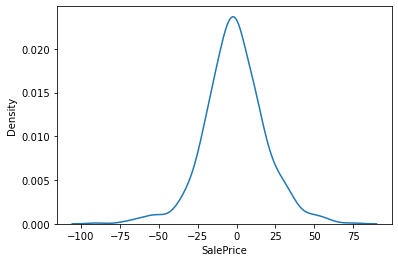

In [28]:
sns.kdeplot(test_res);

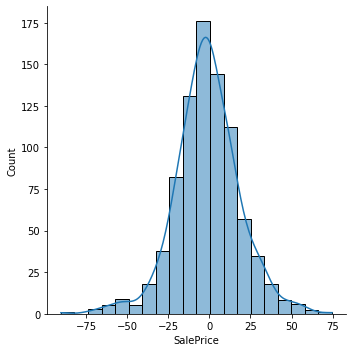

In [29]:
sns.displot(test_res,bins=20,kde=True);

**Test 3 - Probability Plot**

In [30]:
import scipy as sp

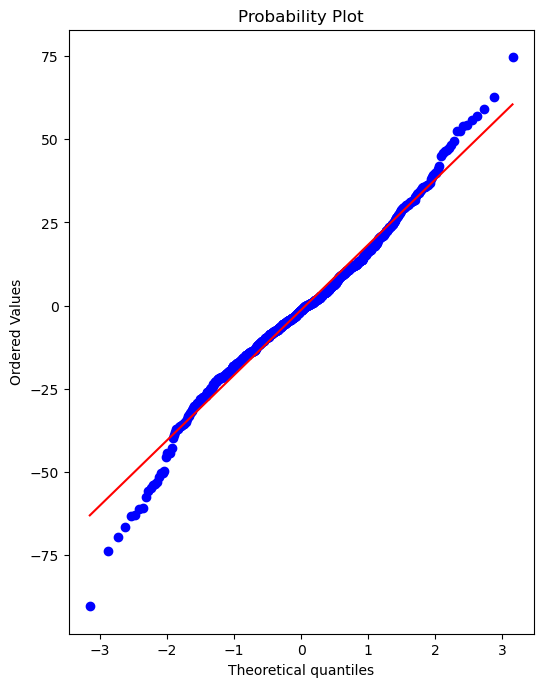

In [31]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)


In [32]:
model.coef_

array([ 3.00222980e-02,  5.22983200e-04,  7.78546026e-01, -1.96918297e+00,
        8.72826190e+00,  5.52669285e+00,  3.33668036e-01,  4.88974765e-02,
        1.88408355e-02, -4.64879954e+00,  1.56908608e+00, -6.31806894e+00,
       -1.26020963e+00, -3.57170212e+00,  1.40045649e-02,  9.30776599e-03,
       -4.45488079e-03,  1.88574523e-02, -2.17260086e+00, -6.36331259e-01,
        2.23874858e-02,  1.78314074e-02, -3.43539667e-03,  3.67834907e-02,
        3.25769030e+00,  2.85330735e+00,  4.38396139e+00,  3.90715799e+00,
       -2.43527511e+00, -1.92985997e+00, -5.13996212e+00,  8.25300208e-01,
        2.19488425e+00, -9.10220759e-01, -4.44228224e-06,  2.36405175e-01,
        5.16655488e+00,  1.49074260e-02, -4.94228615e+00,  1.59877160e+00,
        1.29683564e-02,  1.99900037e-02,  1.75203639e-02,  3.04139447e-02,
        3.97104216e-02, -4.22774630e-03,  8.60418361e-04,  7.88959642e-02,
       -6.17585723e-01, -1.49500398e+00,  3.50181473e+00,  2.40641730e+00,
        5.62167917e+00, -

In [33]:
len(model.coef_)

232

# regulate with RidgeCV

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()

In [36]:
x_train

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCond_AdjLand,SaleCond_Alloca,SaleCond_Family,SaleCond_Normal,SaleCond_Partial
2042,78.000000,9317,1,0,6,5,2006,2006,0.0,1,...,0,0,0,0,1,0,0,0,1,0
1920,40.000000,3880,0,0,5,9,1945,1997,0.0,2,...,0,0,0,0,1,0,0,0,1,0
938,78.870370,6853,1,0,8,5,2001,2002,136.0,1,...,0,0,0,0,1,0,0,0,1,0
824,67.000000,16285,2,0,7,5,2001,2002,0.0,1,...,0,0,0,0,1,0,0,0,1,0
90,25.000000,4835,1,0,7,5,2004,2005,0.0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,80.000000,9600,0,0,5,7,1950,2007,0.0,1,...,0,0,0,0,1,0,0,0,1,0
1599,80.000000,11584,0,0,7,6,1979,1979,96.0,2,...,0,0,0,0,1,0,0,0,1,0
1361,85.176471,2887,0,0,6,5,1996,1997,0.0,2,...,0,0,0,0,1,0,0,0,1,0
1547,21.000000,1596,0,0,4,6,1973,1973,0.0,2,...,0,0,0,0,1,0,0,0,1,0


In [37]:
scaler.fit(x_train)

StandardScaler()

In [38]:
x_train=scaler.transform(x_train)

In [39]:
x_test=scaler.transform(x_test)

In [40]:
x_train

array([[ 0.40469252, -0.08190949,  1.05540351, ..., -0.12803688,
         0.45960114, -0.29918432],
       [-1.35364217, -0.8300575 , -0.70715589, ..., -0.12803688,
         0.45960114, -0.29918432],
       [ 0.44496627, -0.42096351,  1.05540351, ..., -0.12803688,
         0.45960114, -0.29918432],
       ...,
       [ 0.73676192, -0.96669738, -0.70715589, ..., -0.12803688,
         0.45960114, -0.29918432],
       [-2.23280951, -1.14434297, -0.70715589, ..., -0.12803688,
         0.45960114, -0.29918432],
       [ 0.26587662, -0.27001292,  1.05540351, ..., -0.12803688,
         0.45960114, -0.29918432]])

In [41]:
from sklearn.linear_model import RidgeCV

In [42]:
ridge_cv_model=RidgeCV(alphas=(0.1,1.0,10.0),scoring='neg_mean_absolute_error')

In [43]:
ridge_cv_model.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [44]:
ridge_cv_model.alpha_

10.0

In [45]:
test_pred=ridge_cv_model.predict(x_test)

In [46]:
MAE=mean_absolute_error(y_test,test_pred)
MAE

14.665375312970657

In [47]:
MSE=mean_squared_error(y_test,test_pred)
MSE

388.629670290802

In [48]:
RMSE=np.sqrt(MSE)
RMSE

19.713692457041173

In [49]:
# test on train set

train_pred=ridge_cv_model.predict(x_train)
MAE=mean_absolute_error(y_train,train_pred)
MAE

13.460314056407562

In [50]:
RMSE*100/df['SalePrice'].mean()

4.781897207239412

5% percent of error percentage for predicting sales price

**Test 2 - Residual Plot and Distribution Plot**

In [51]:
test_res=y_test-test_pred

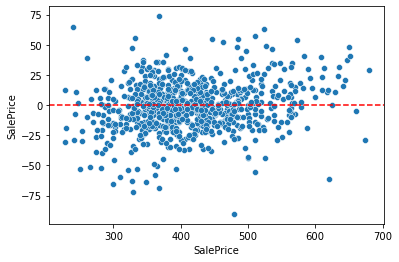

In [52]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--');

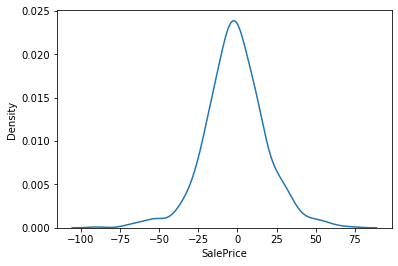

In [53]:
sns.kdeplot(test_res);

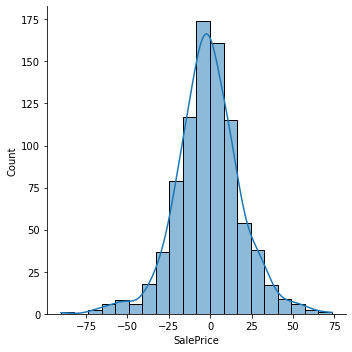

In [54]:
sns.displot(test_res,bins=20,kde=True);

**Test 3 - Probability Plot**

In [55]:
import scipy as sp

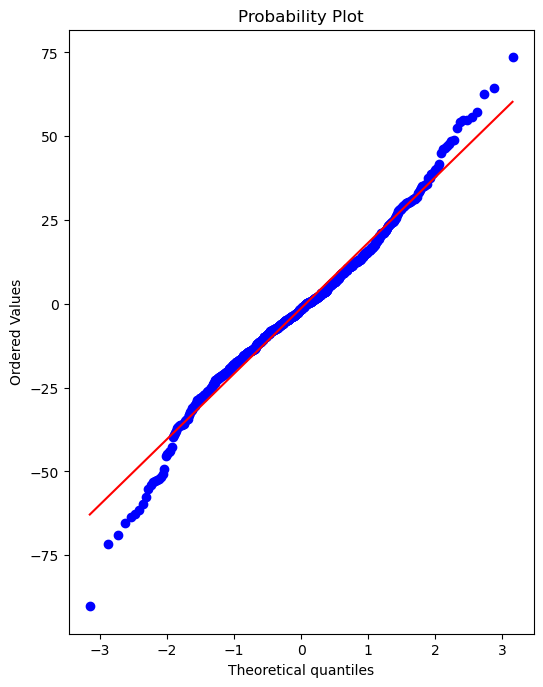

In [56]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)


In [57]:
ridge_cv_model.coef_

array([ 6.77905217e-01,  3.75320757e+00,  5.16039742e-01, -5.13789620e-01,
        1.17806568e+01,  6.01123183e+00,  9.21718402e+00,  1.12857222e+00,
        2.93477749e+00, -2.75577295e+00,  5.43096976e-01, -5.72301827e+00,
       -8.10818695e-01, -3.77022195e+00,  6.64821127e+00,  1.86455967e+00,
       -1.01064487e+00,  6.66383682e+00, -2.07691781e+00, -2.07530989e-01,
        8.77267143e+00,  8.50631122e+00, -2.16069427e-02,  1.46104881e+01,
        1.74149718e+00,  6.48547289e-01,  2.45311609e+00,  2.01374887e+00,
       -1.88526699e+00, -4.75920949e-01, -3.36950273e+00,  1.32321066e+00,
        1.48904797e+00, -1.64609578e+00, -1.06672836e+00,  2.01207254e-01,
        3.75339431e+00,  3.13459494e+00, -2.98075884e+00,  7.91796607e-01,
        1.53107859e+00,  1.29796976e+00,  1.15664605e+00,  6.99652863e-01,
        2.11203470e+00, -1.45864389e-01,  5.08246976e-01,  1.66091151e-01,
       -7.92530592e-01, -4.21511505e-01,  1.01305758e-01, -2.17500573e-02,
        9.00004526e-01, -

In [58]:
x_train.shape

(1984, 232)

In [59]:
## alpha - learning rate

## weighted - bias

## POLYNOMIAL REGRESSION

In [60]:
from sklearn.preprocessing import PolynomialFeatures

In [61]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [62]:
poly_features=polynomial_converter.fit_transform(x)

In [63]:
x.shape

(2835, 232)

In [64]:
poly_features.shape

(2835, 27260)

**Train|Test Split**

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
model=LinearRegression(fit_intercept=True)

In [69]:
model.fit(x_train,y_train)

LinearRegression()

In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [71]:
test_pred=model.predict(x_test)

In [72]:
MAE=mean_absolute_error(y_test,test_pred)

MAE

212.35715886173102

In [73]:
MSE = mean_squared_error(y_test,test_pred)

MSE

173015.05953771994

In [74]:
RMSE=np.sqrt(MSE)

RMSE

415.9507898029765

In [75]:
df['SalePrice'].mean()

412.2567174216169

In [76]:
1090274/179050*100

608.9215302987992

**adjusting the parameters of model**

train_rmse_errors = []
test_rmse_errors = []

for d in range(1,8):
    print(d)
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(x)
    
    #SPLIT THIS NEW POLY DATA SET
    x_train,x_test,y_train,y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(x_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    # CALCULATE ERRORS
    
    # ERRORS ON TRAIN SET
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # ERRORS ON TEST SET
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    
    # APPEND ERRORS TO LISTS FOR PLOTTING LATER
    
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    
    
    # CANT USE POLYNOMIAL FEATURES AS IT INCREASE THE NUMBER OF FEATURES....TO MANY FEATURES..MORE COMPLEX
    

plt.plot(range(1,8),train_rmse_errors[:3],marker='o',label='TRAIN')
plt.plot(range(1,8),test_rmse_errors[:3],marker='+',label='TEST')

plt.xlabel('Polynomial Complexity order')
plt.ylabel('RMSE')
plt.legend();

**CANT USE POLYNOMIAL FEATURES AS IT INCREASE THE NUMBER OF FEATURES....TO MANY FEATURES..MORE COMPLEX**

## REGULARIZATION - LASSO (L1)

In [77]:
df=pd.read_csv('Ames_Housing_Clean_Data(remove skew).csv')

x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler=StandardScaler()

In [80]:
scaler.fit(x_train)

StandardScaler()

In [81]:
x_train=scaler.transform(x_train)

In [82]:
x_test=scaler.transform(x_test)

In [83]:
from sklearn.linear_model import LassoCV

In [84]:
lasso_cv_model=LassoCV(eps=0.1,n_alphas=100,cv=5)

In [85]:
lasso_cv_model.fit(x_train,y_train)

LassoCV(cv=5, eps=0.1)

In [86]:
lasso_cv_model.alpha_

6.481382869014167

In [87]:
test_pred=lasso_cv_model.predict(x_test)

In [88]:
MAE=mean_absolute_error(y_test,test_pred)

MAE**2

387.70619853740993

In [89]:
MSE=mean_squared_error(y_test,test_pred)

MSE**2

471553.2882692185

In [90]:
RMSE=np.sqrt(MSE)

RMSE**2

686.6973775027967

In [91]:
## train performance

train_predictions=lasso_cv_model.predict(x_train)
MAE=mean_absolute_error(y_train,train_predictions)
MAE**2

416.3141260789489

In [92]:
df['SalePrice'].mean()**2

169955.60105924687

In [93]:
RMSE*100/df['SalePrice'].mean()**2

0.015418680620559847

6% percent of error percentage for predicting sales price

**Test 2 - Residual Plot and Distribution Plot**

In [94]:
test_res=y_test-test_pred

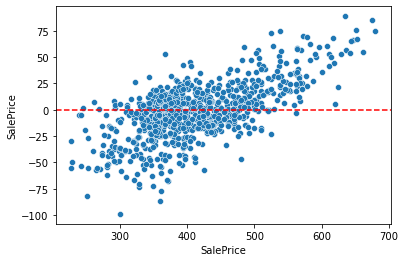

In [95]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--');

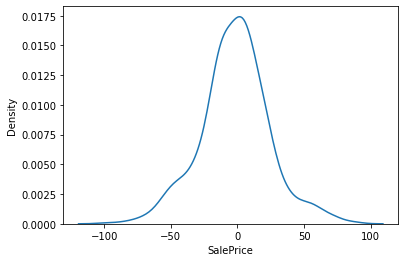

In [96]:
sns.kdeplot(test_res);

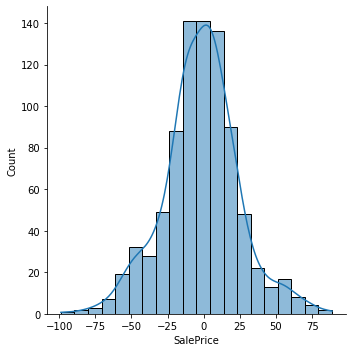

In [97]:
sns.displot(test_res,bins=20,kde=True);

**Test 3 - Probability Plot**

In [98]:
import scipy as sp

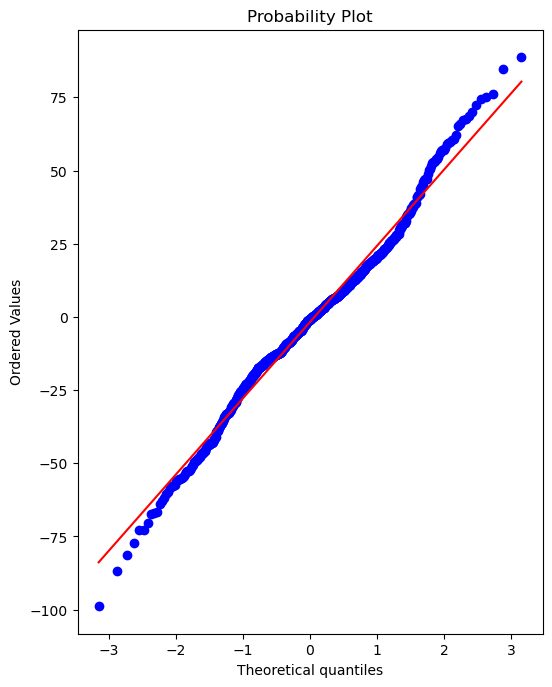

In [99]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)


In [100]:
lasso_cv_model.coef_

array([ 0.38524156,  0.20688335,  0.        ,  0.        , 21.1606324 ,
        0.        ,  4.28206042,  1.89084758,  0.        , -4.93050123,
       -0.        , -2.68415903, -0.        , -1.26511595,  6.17224598,
        0.        , -0.        ,  5.70241612, -0.39537473, -0.        ,
        2.83142585,  0.        , -0.        , 20.29314719,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -5.66190711,  0.        ,  0.        , -3.35945074,  0.        ,
       -1.10427349,  3.32054643,  4.62146682, -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -1.38

In [101]:
lasso_coef=lasso_cv_model.coef_

In [102]:
lasso_coef[lasso_coef>0]

array([ 0.38524156,  0.20688335, 21.1606324 ,  4.28206042,  1.89084758,
        6.17224598,  5.70241612,  2.83142585, 20.29314719,  3.32054643,
        4.62146682,  0.36269954])

In [103]:
np.where(lasso_coef>0)

(array([  0,   1,   4,   6,   7,  14,  17,  20,  23,  36,  37, 223],
       dtype=int64),)

In [104]:
lasso_coef.shape

(232,)

In [105]:
df.columns[[0,1,4,6,7,14,17,20,23,36,37,223]]

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Garage Cars', 'Garage Area', 'SaleType_ConLw'],
      dtype='object')

In [106]:
x

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCond_AdjLand,SaleCond_Alloca,SaleCond_Family,SaleCond_Normal,SaleCond_Partial
0,141.000000,31770,1,0,6,5,1960,1960,112.0,2,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,0,0,5,6,1961,1961,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,1,0,6,6,1958,1958,108.0,2,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,0,0,7,5,1968,1968,0.0,1,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,1,0,5,5,1997,1998,0.0,2,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,37.000000,7937,1,0,6,6,1984,1984,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2831,75.157303,8885,1,1,5,5,1983,1983,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2832,62.000000,10441,0,0,5,5,1992,1992,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2833,77.000000,10010,0,1,5,5,1974,1975,0.0,2,...,0,0,0,0,1,0,0,0,1,0


In [107]:
x=df[['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Garage Cars', 'Garage Area', 'SaleType_ConLw']]
y=df['SalePrice']

In [108]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
scaler=StandardScaler()

In [111]:
scaler.fit(x_train)

StandardScaler()

In [112]:
x_train=scaler.transform(x_train)

In [113]:
x_test=scaler.transform(x_test)

In [114]:
from sklearn.linear_model import LassoCV

In [115]:
final_lasso_cv_model=LassoCV(eps=0.1,n_alphas=100,cv=5)

In [116]:
final_lasso_cv_model.fit(x_train,y_train)

LassoCV(cv=5, eps=0.1)

In [117]:
final_lasso_cv_model.alpha_

6.481382869014167

In [118]:
test_pred=final_lasso_cv_model.predict(x_test)

In [119]:
MAE=mean_absolute_error(y_test,test_pred)

MAE

20.395256774801645

In [120]:
MSE=mean_squared_error(y_test,test_pred)

MSE

758.9561341026554

In [121]:
RMSE=np.sqrt(MSE)

RMSE

27.549158500808247

In [122]:
## train performance

train_predictions=final_lasso_cv_model.predict(x_train)
MAE=mean_absolute_error(y_train,train_predictions)
MAE

21.600193603752924

In [123]:
df['SalePrice'].mean()

412.2567174216169

In [124]:
RMSE*100/df['SalePrice'].mean()

6.682525071540216

6% percent of error percentage for predicting sales price

**Test 2 - Residual Plot and Distribution Plot**

In [125]:
test_res=y_test-test_pred

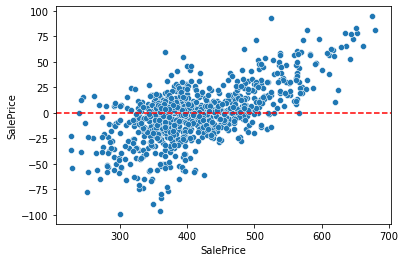

In [126]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--');

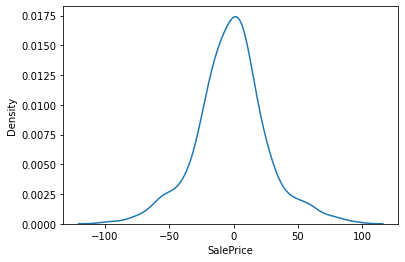

In [127]:
sns.kdeplot(test_res);

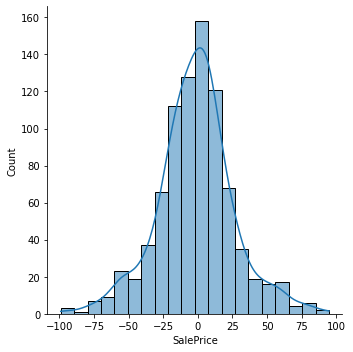

In [128]:
sns.displot(test_res,bins=20,kde=True);

**Test 3 - Probability Plot**

In [129]:
import scipy as sp

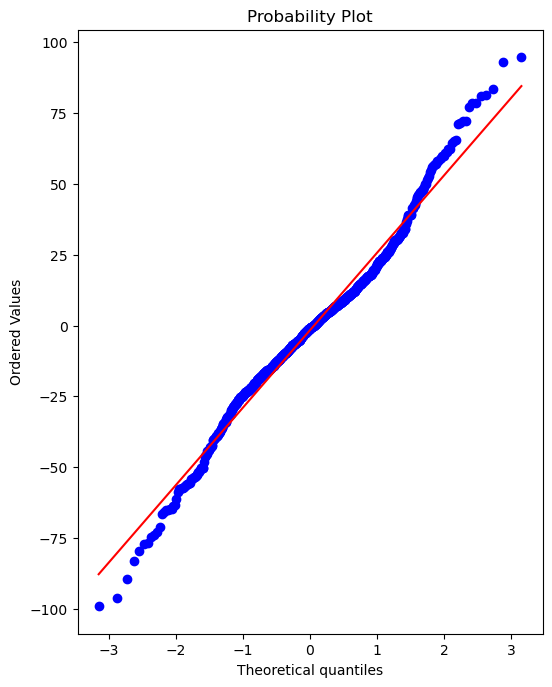

In [130]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)


## REGULARIZATION - RIDGE (L2)

## REGULARIZATION - ELASTIC NET (L3)

In [131]:
df=pd.read_csv('Ames_Housing_Clean_Data(remove skew).csv')

x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler=StandardScaler()

In [134]:
scaler.fit(x_train)

StandardScaler()

In [135]:
x_train=scaler.transform(x_train)

In [136]:
x_test=scaler.transform(x_test)

In [137]:
from sklearn.linear_model import ElasticNetCV

In [138]:
elastic_model=ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1],tol=0.01)

In [139]:
elastic_model.fit(x_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [140]:
elastic_model.l1_ratio_

1.0

In [141]:
test_pred=elastic_model.predict(x_test)

In [142]:
MAE=mean_absolute_error(y_test,test_pred)
MSE=mean_squared_error(y_test,test_pred)
RMSE=np.sqrt(MSE)

In [143]:
MAE

14.194304137428352

In [144]:
MSE

364.3079508402866

In [145]:
RMSE

19.08685282701909

In [146]:
train_pred = elastic_model.predict(x_train)
MAE=mean_absolute_error(y_train,train_pred)
MAE

13.831898791846776

In [147]:
df['SalePrice'].mean()

412.2567174216169

In [148]:
RMSE*100/df['SalePrice'].mean()

4.629846408906147

5% percent of error percentage for predicting sales price

**Test 2 - Residual Plot and Distribution Plot**

In [149]:
test_res=y_test-test_pred

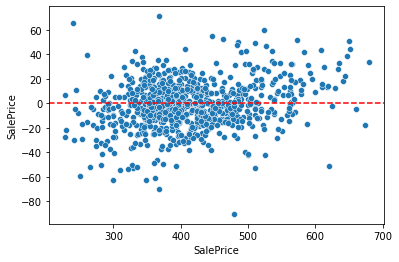

In [150]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--');

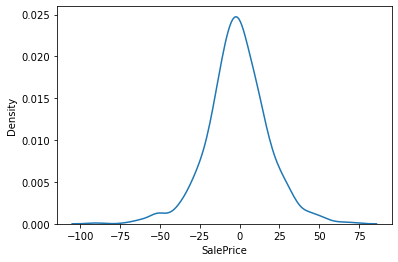

In [151]:
sns.kdeplot(test_res);

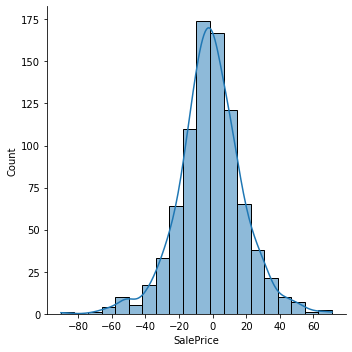

In [152]:
sns.displot(test_res,bins=20,kde=True);

**Test 3 - Probability Plot**

In [153]:
import scipy as sp

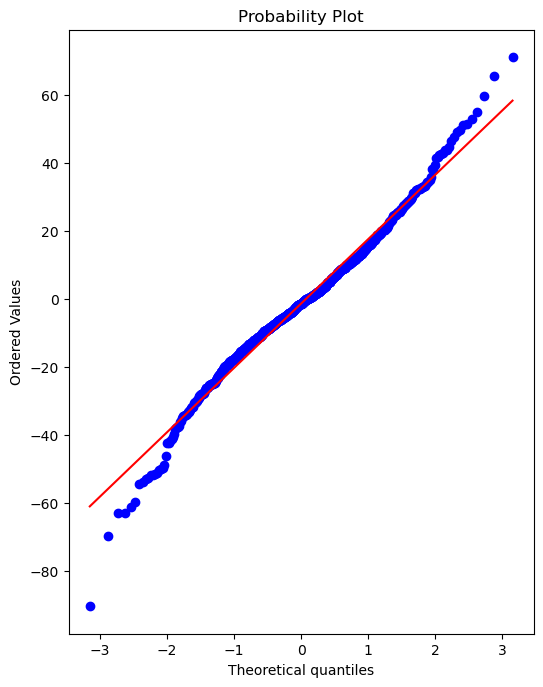

In [154]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)


In [155]:
elastic_model.coef_

array([ 6.73170954e-01,  3.24465661e+00,  5.43030698e-01, -0.00000000e+00,
        1.35425155e+01,  5.87820644e+00,  1.01791823e+01,  1.27606225e+00,
        2.60486738e+00, -3.00357269e+00,  0.00000000e+00, -4.85148875e+00,
       -0.00000000e+00, -3.61476272e+00,  7.80200729e+00,  1.94204868e+00,
       -0.00000000e+00,  5.18173299e+00, -1.97834036e+00, -2.58650978e-01,
        1.22585097e+01,  1.10621980e+01,  0.00000000e+00,  1.15253149e+01,
        1.61958561e+00,  2.34946361e-01,  1.49150407e+00,  1.17229466e+00,
       -1.22100249e+00, -6.64971742e-01, -3.32602588e+00,  4.88437168e-01,
        1.63381491e+00, -1.55424448e+00, -5.39659082e-02, -0.00000000e+00,
        3.22278349e+00,  2.92162710e+00,  0.00000000e+00,  0.00000000e+00,
        1.30910759e+00,  1.10035745e+00,  9.27354965e-01,  3.29225096e-01,
        1.76701651e+00, -0.00000000e+00,  2.27649891e-01,  0.00000000e+00,
       -4.74293494e-01, -6.66951240e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

## GRID SEARCH CV 

In [156]:
df=pd.read_csv('Ames_Housing_Clean_Data(remove skew).csv')

x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
scaler=StandardScaler()

In [159]:
scaler.fit(x_train)

StandardScaler()

In [160]:
x_train=scaler.transform(x_train)

In [161]:
x_test=scaler.transform(x_test)

In [162]:
from sklearn.linear_model import ElasticNet

In [163]:
base_elastic_model = ElasticNet()

In [164]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [165]:
from sklearn.model_selection import GridSearchCV

# import GridSearchCV

In [166]:
# verbose number a personal preference

grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

#cv value = maximum value can be same number of features

In [167]:
grid_model.fit(x_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .

[CV] .............................. alpha=1, l1_ratio=1, total=   0.0s
[CV] alpha=1, l1_ratio=1 .............................................
[CV] .............................. alpha=1, l1_ratio=1, total=   0.0s
[CV] alpha=1, l1_ratio=1 .............................................
[CV] .............................. alpha=1, l1_ratio=1, total=   0.0s
[CV] alpha=1, l1_ratio=1 .............................................
[CV] .............................. alpha=1, l1_ratio=1, total=   0.0s
[CV] alpha=1, l1_ratio=1 .............................................
[CV] .............................. alpha=1, l1_ratio=1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] .

[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.0s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.0s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .

[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    7.3s finished


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [168]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.7)

In [169]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.7}

In [170]:
 pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.055851,0.007543,0.000798,3.987808e-04,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-461.178229,-438.406269,-504.878457,-453.508120,-475.920008,-466.778217,22.572653,7
1,0.048390,0.008292,0.000782,3.922380e-04,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-458.351576,-436.867377,-495.526028,-451.216484,-470.209069,-462.434107,19.756948,4
2,0.047281,0.008080,0.000998,1.353747e-06,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-458.419782,-437.551980,-490.430897,-451.191498,-468.526807,-461.224193,17.749665,1
3,0.088364,0.009454,0.000998,6.309020e-04,0.1,0.9,"{'alpha': 0.1, 'l1_ratio': 0.9}",-460.898975,-440.910423,-487.067914,-452.550902,-467.751871,-461.836017,15.470086,2
4,0.167353,0.021845,0.003790,5.101107e-03,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-462.203560,-441.651567,-485.735187,-453.453773,-468.427457,-462.294309,14.774142,3
5,0.163165,0.033219,0.001197,3.980897e-04,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-463.808818,-441.907266,-484.153664,-454.730986,-468.530442,-462.626235,14.080476,5
6,0.151499,0.025639,0.000598,4.886564e-04,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-464.110490,-441.881856,-483.534792,-455.103197,-468.708416,-462.667750,13.880061,6
7,0.033112,0.002308,0.001596,7.972959e-04,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-546.038148,-556.299254,-674.105833,-533.154067,-595.802786,-581.080018,51.008779,14
8,0.032616,0.005811,0.001396,4.891617e-04,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-513.655647,-507.592520,-619.425951,-493.210973,-546.188969,-536.014812,45.168261,13
9,0.034110,0.002394,0.001396,4.887728e-04,1,0.7,"{'alpha': 1, 'l1_ratio': 0.7}",-498.881482,-484.305574,-588.149264,-479.455526,-526.564246,-515.471218,39.871796,12


In [171]:
test_pred = grid_model.predict(x_test)

In [172]:
from sklearn.metrics import mean_squared_error

In [173]:
MAE = mean_absolute_error(y_test,test_pred)

MAE

14.400338886454044

In [174]:
MSE=mean_squared_error(y_test,test_pred)

MSE

377.87575537011577

In [175]:
RMSE=np.sqrt(MSE)

RMSE

19.439026605520034

In [176]:
#predict on train set

train_pred=grid_model.predict(x_train)

MSE = mean_squared_error(y_train,train_pred)
RMSE= np.sqrt(MSE)

RMSE

18.713676738146376

In [177]:
df['SalePrice'].mean()

412.2567174216169

In [178]:
RMSE*100/df['SalePrice'].mean()

4.5393260915644005

In [179]:
4**2

16

5% percent of error percentage for predicting sales price

**Test 2 - Residual Plot and Distribution Plot**

In [180]:
test_res=y_test-test_pred

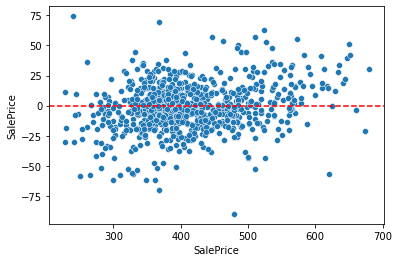

In [181]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--');

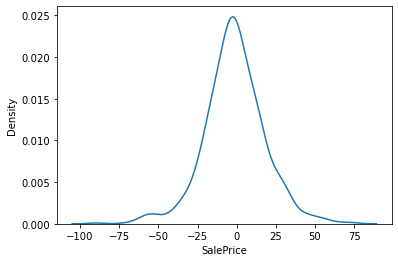

In [182]:
sns.kdeplot(test_res);

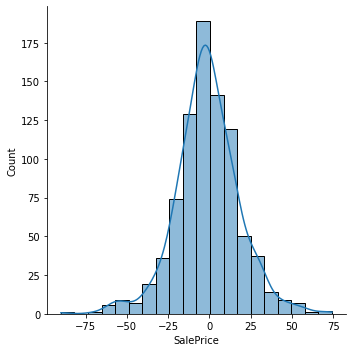

In [183]:
sns.displot(test_res,bins=20,kde=True);

**Test 3 - Probability Plot**

In [184]:
import scipy as sp

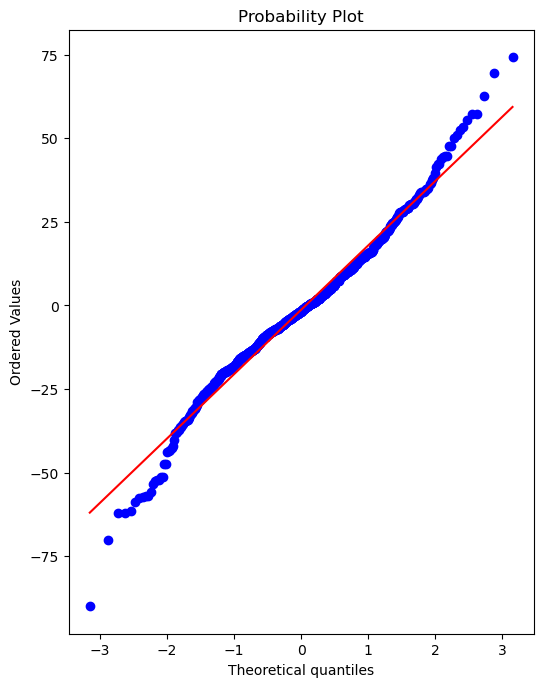

In [185]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)


## model deployment

In [186]:
from joblib import dump, load

In [187]:
dump(scaler,'ames_scaler.pkl')

['ames_scaler.pkl']

In [188]:
dump(grid_model,'ames_model.h5')

['ames_model.h5']

In [189]:
df.corr()['SalePrice'].sort_values()

Exter Qual      -0.701881
Kitchen Qual    -0.676143
Bsmt Qual       -0.634901
Garage Finish   -0.594386
Fireplace Qu    -0.544786
                   ...   
Garage Area      0.670630
Garage Cars      0.688611
Gr Liv Area      0.705587
Overall Qual     0.824929
SalePrice        1.000000
Name: SalePrice, Length: 233, dtype: float64

In [190]:
sale_price_example = {'Overall Qual':8,
                 'Gr Liv Area':3000,
                 'Garage Cars':3.0,
                 'Total Bsmt SF':3000}

In [191]:
from joblib import dump, load

sale_price_model = load('ames_model.h5')

sale_price_scaler = load('ames_scaler.pkl')

def return_prediction(model,scaler,sample_json):
    
    ovr_qual = sample_json['Overall Qual']
    gr_liv_area = sample_json['Gr Liv Area']
    gr_cars = sample_json['Garage Cars']
    t_bsmt_sf = sample_json['Total Bsmt SF']
    
    
    sale_price = [[ovr_qual,gr_liv_area,gr_cars,t_bsmt_sf]]
    
    sale_price = scaler.transform(sale_price)
    
    prediction= model.predict(sale_price)
    
    return prediction[0]

In [192]:
df['Overall Qual']

0       6
1       5
2       6
3       7
4       5
       ..
2830    6
2831    5
2832    5
2833    5
2834    7
Name: Overall Qual, Length: 2835, dtype: int64

## RIDGE CV WITHOUT SCALER

In [193]:
df=pd.read_csv('Ames_Housing_Clean_Data(remove skew).csv')

x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [194]:
from sklearn.linear_model import RidgeCV

In [195]:
ridge_cv_model=RidgeCV(alphas=(0.1,1.0,10.0),scoring='neg_mean_absolute_error')

In [196]:
ridge_cv_model.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [197]:
ridge_cv_model.alpha_

10.0

In [198]:
test_pred=ridge_cv_model.predict(x_test)

In [199]:
MAE=mean_absolute_error(y_test,test_pred)
MAE

14.19464580463125

In [200]:
MSE=mean_squared_error(y_test,test_pred)
MSE

356.9530460046366

In [201]:
RMSE=np.sqrt(MSE)
RMSE

18.893201052353106

In [202]:
# test on train set

train_pred=ridge_cv_model.predict(x_train)
MAE=mean_absolute_error(y_train,train_pred)
MAE

14.03820322653755

In [203]:
RMSE*100/df['SalePrice'].mean()

4.582872820245871

5% percent of error percentage for predicting sales price

**Test 2 - Residual Plot and Distribution Plot**

In [204]:
test_res=y_test-test_pred

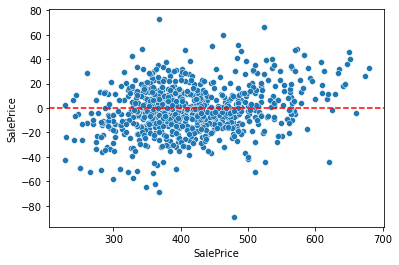

In [205]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--');

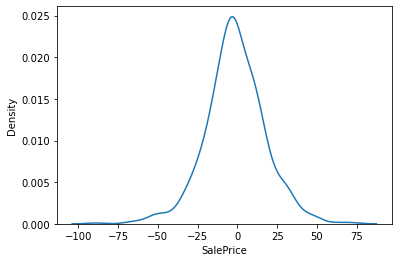

In [206]:
sns.kdeplot(test_res);

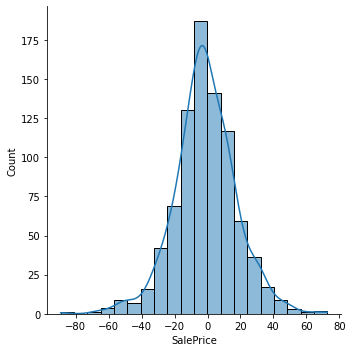

In [207]:
sns.displot(test_res,bins=20,kde=True);

**Test 3 - Probability Plot**

In [208]:
import scipy as sp

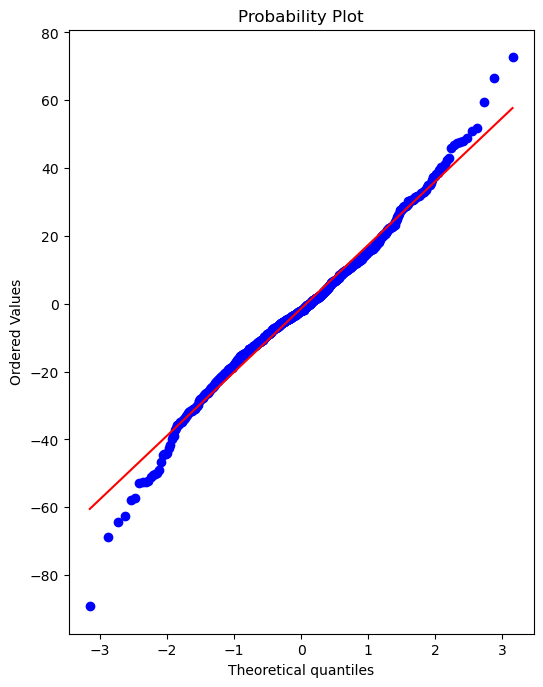

In [209]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)


In [210]:
ridge_cv_model.coef_

array([ 5.31407889e-02,  4.40827920e-04,  1.42971814e+00, -4.40554721e-01,
        9.89458102e+00,  6.22636713e+00,  3.67351077e-01,  5.40389638e-02,
        2.29431683e-02, -5.07843133e+00,  1.42051798e+00, -5.53570327e+00,
       -1.58875695e-01, -3.65916634e+00,  1.35491878e-02,  1.04066304e-02,
       -5.02216446e-03,  1.89336538e-02, -2.08997470e+00, -2.27348871e+00,
        2.44647922e-02,  1.93210186e-02, -8.57443397e-03,  3.52113768e-02,
        3.26036923e+00,  2.08111446e+00,  3.54988073e+00,  2.84839735e+00,
       -2.70970688e+00, -4.70064598e+00, -5.54058054e+00,  8.55101732e-01,
        2.58094805e+00, -8.85615012e-01, -7.15082129e-03,  1.47394113e-02,
        4.95806245e+00,  1.53339419e-02, -1.29983445e+00, -1.00272263e+00,
        1.02114871e-02,  1.95087957e-02,  1.98261599e-02,  2.39951453e-02,
        3.49402678e-02, -7.70571135e-03,  4.96877845e-04,  8.92438369e-02,
       -5.35654776e-01, -9.92002940e-01, -1.30880717e-01,  3.44719442e+00,
        4.14742530e+00,  